In [1]:
import gym
import torch
import gym_nav
import numpy as np

import sys
sys.path.append('../')
from evaluation import *
from model_evaluation import *
from trajectories import *
%run ../evaluation 

from tqdm import tqdm
import itertools

from representation_analysis import *
from explore_analysis import *

In [15]:
np.random.seed(0)
grid_points = [np.array(p) for p in itertools.permutations(np.linspace(5, 295, 6), r=2)]
grid_angles = np.random.uniform(-np.pi, np.pi, size=len(grid_points))


In [65]:
hidden = 64
trial = 0
obs = 3
exp_name = f'../saved_models/explorenav_pos/expl_goalpos_obs3hidden{hidden}longer_t{trial}.pt'
exp_name = f'../saved_models/explorenav_pos/expl_goalpos_batch128obs3hidden{hidden}longer_t{trial}.pt'
model, obs_rms = torch.load(exp_name)

env_kwargs = {'rew_structure': 'explorepunish1_explorebonus',
              'sub_goal_reward': 0.04, 'bonus_multiplier': 5,
              'explore_punish_arg': 5, 'obs_set': obs}


In [66]:
%%time
effs, trajs, ress = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs, ret_res=True,
                       manual_starts=[grid_points, grid_angles])

CPU times: total: 27.8 s
Wall time: 35.3 s


In [55]:

res = evaluate(model, obs_rms, env_name='ExploreNav-v0',
         env_kwargs=env_kwargs, data_callback=explore_data_callback,)

In [135]:
pickle.dump([effs, trajs, ress], open('data/test', 'wb'))

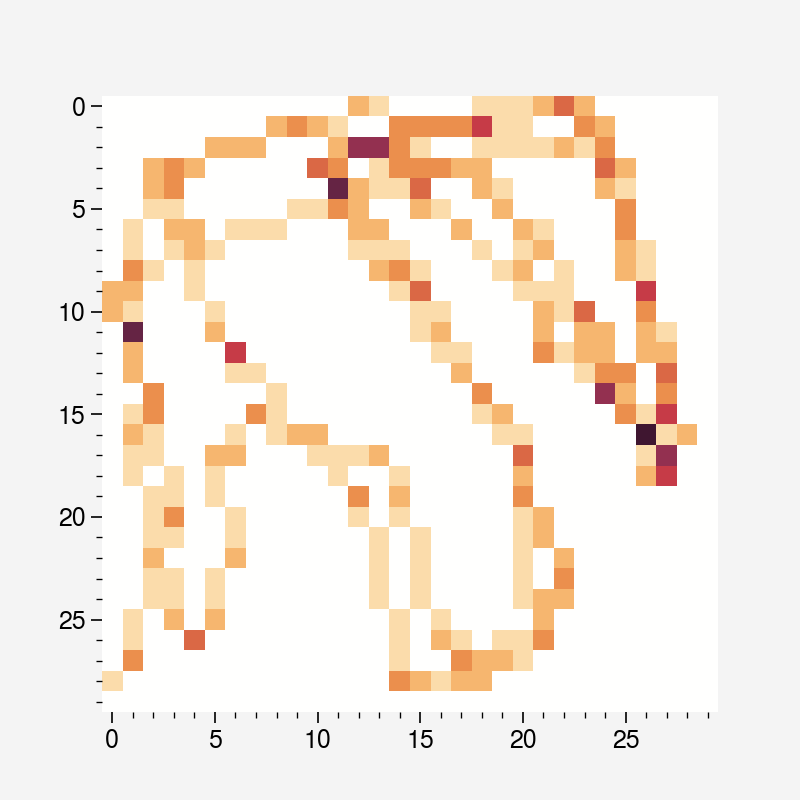

In [118]:
plt.imshow(rasterize_pos(trajs[0][0], sigma=0))

In [19]:
all_pos = np.vstack([trajs[i][0] for i in range(len(trajs))])

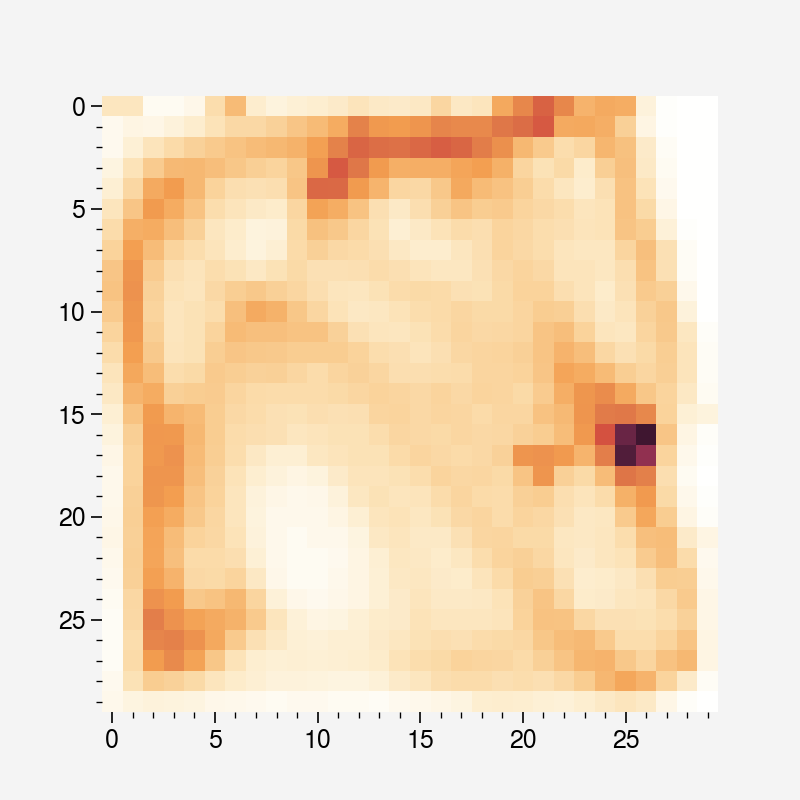

In [125]:
plt.imshow(rasterize_pos(all_pos, 0.5))

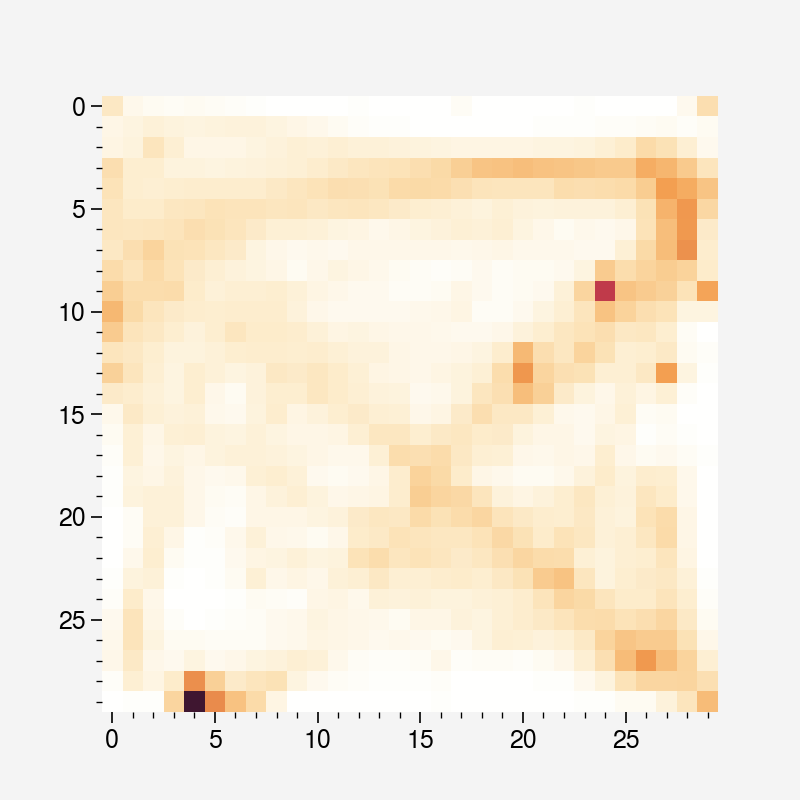

In [20]:
plt.imshow(rasterize_pos(all_pos, 0.5))

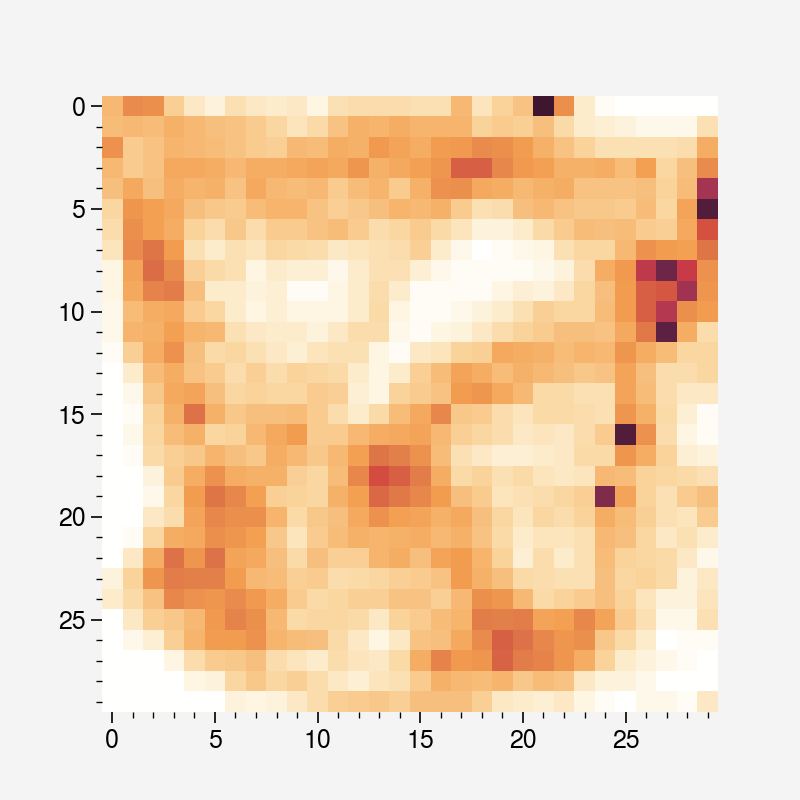

In [69]:
plt.imshow(rasterize_pos(np.vstack([trajs[i][0] for i in range(len(trajs))]), 0.5))

In [22]:
np.mean(effs)

0.0010227094550390103

In [23]:
np.std(effs)

0.00011204551520749261

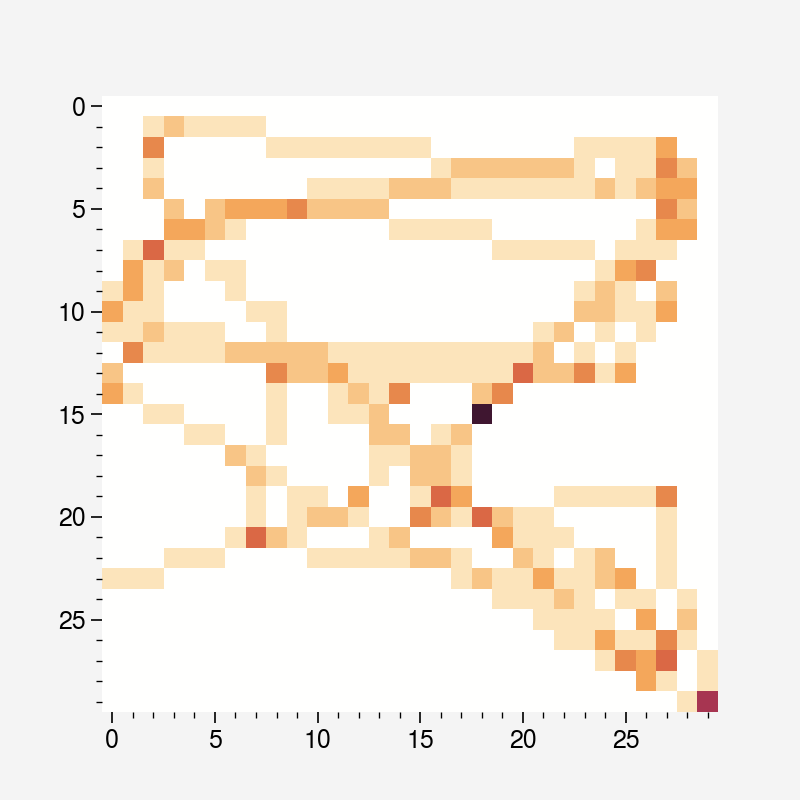

In [32]:
plt.imshow(rasterize_pos(trajs[0][0], sigma=0))

In [37]:
r1 = rasterize_pos(trajs[0][0], sigma=0).reshape(-1)
r2 = rasterize_pos(trajs[1][0], sigma=0).reshape(-1)

In [35]:
from sklearn.metrics.pairwise import cosine_similarity


In [40]:
rs = [rasterize_pos(trajs[i][0], sigma=0).reshape(-1) for i in range(len(trajs))]

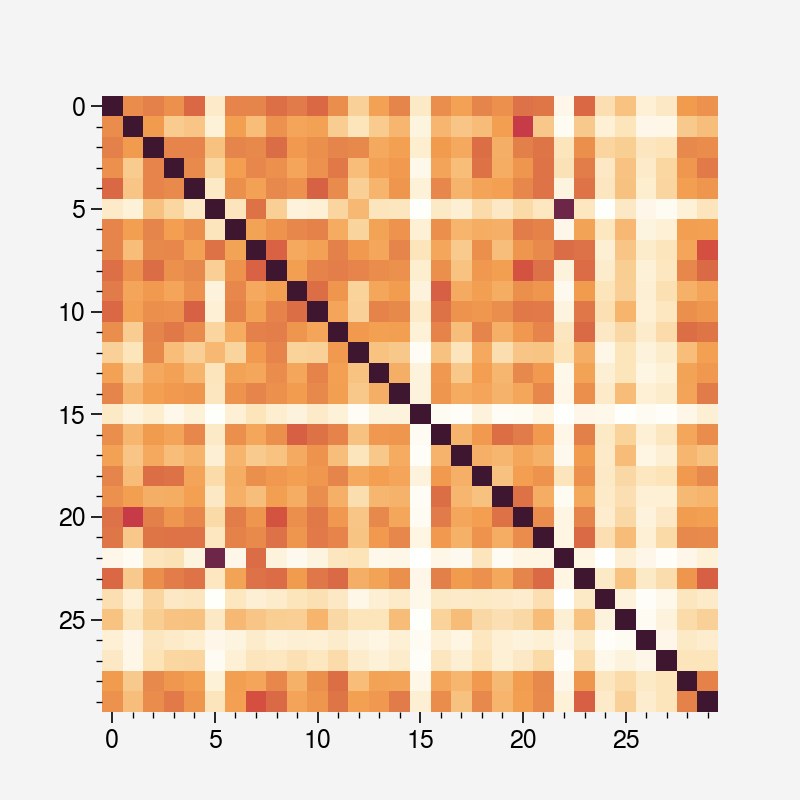

In [42]:
plt.imshow(cosine_similarity(rs))

In [47]:
cs = cosine_similarity(rs)

In [ ]:
np.triu(

In [51]:
idxs = np.triu(np.full(cs.shape, True), k=1)


In [54]:
cs[idxs].mean()

0.24467443886229734

In [70]:
rs = [rasterize_pos(trajs[i][0], sigma=0).reshape(-1) for i in range(len(trajs))]
cs = cosine_similarity(rs)
idxs = np.triu(np.full(cs.shape, True), k=1)
cs[idxs].mean()

0.19993080632937155

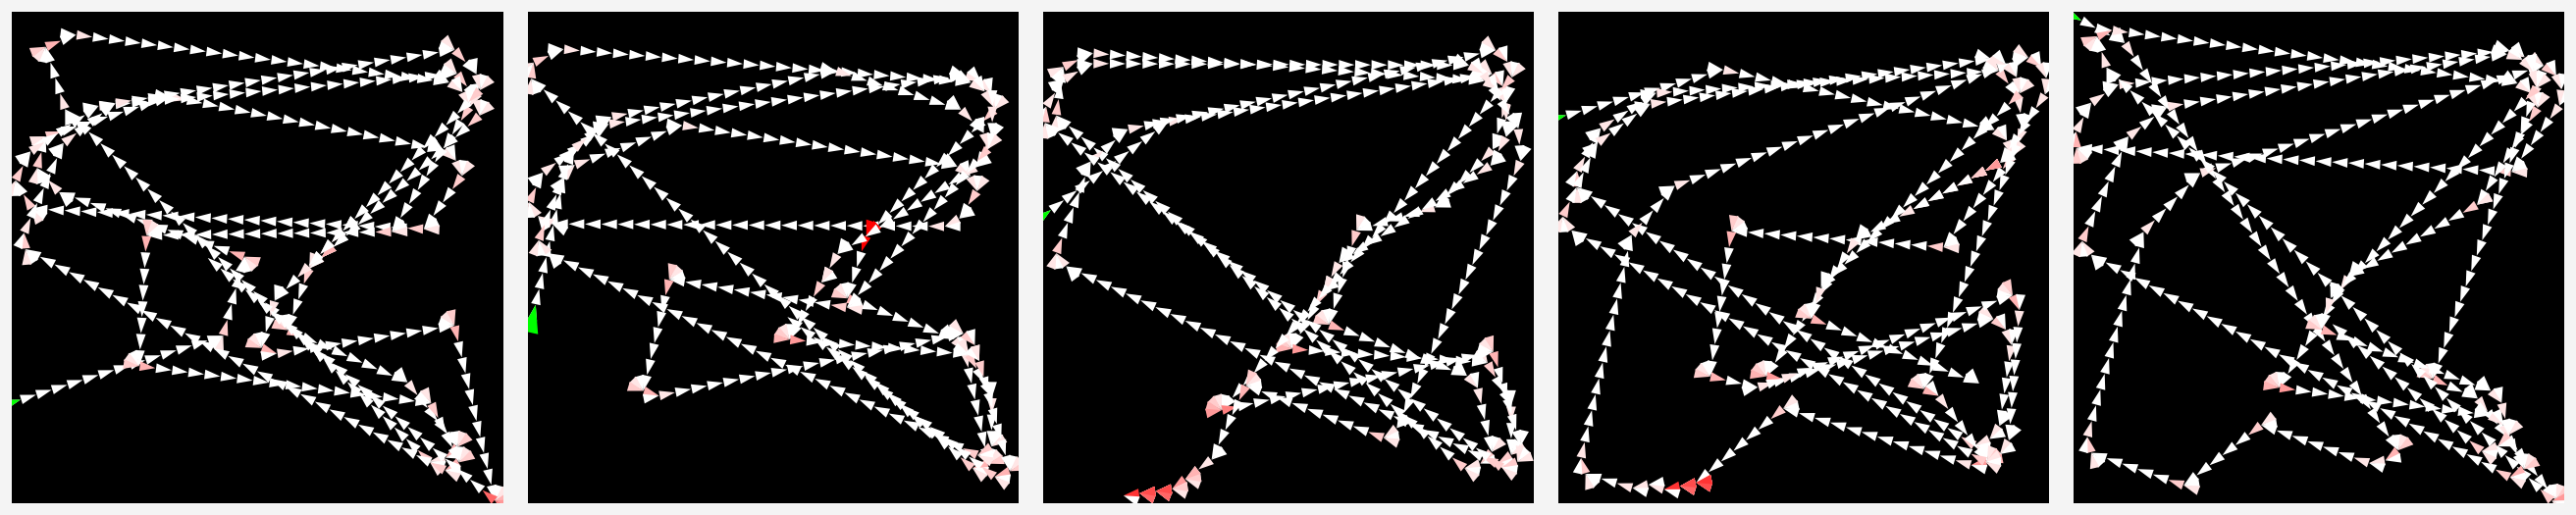

In [27]:
fig, ax = pplt.subplots(ncols=5)
for i in range(5):
    p, a = trajs[i]
    draw_trajectory(p, a, ax=ax[i])

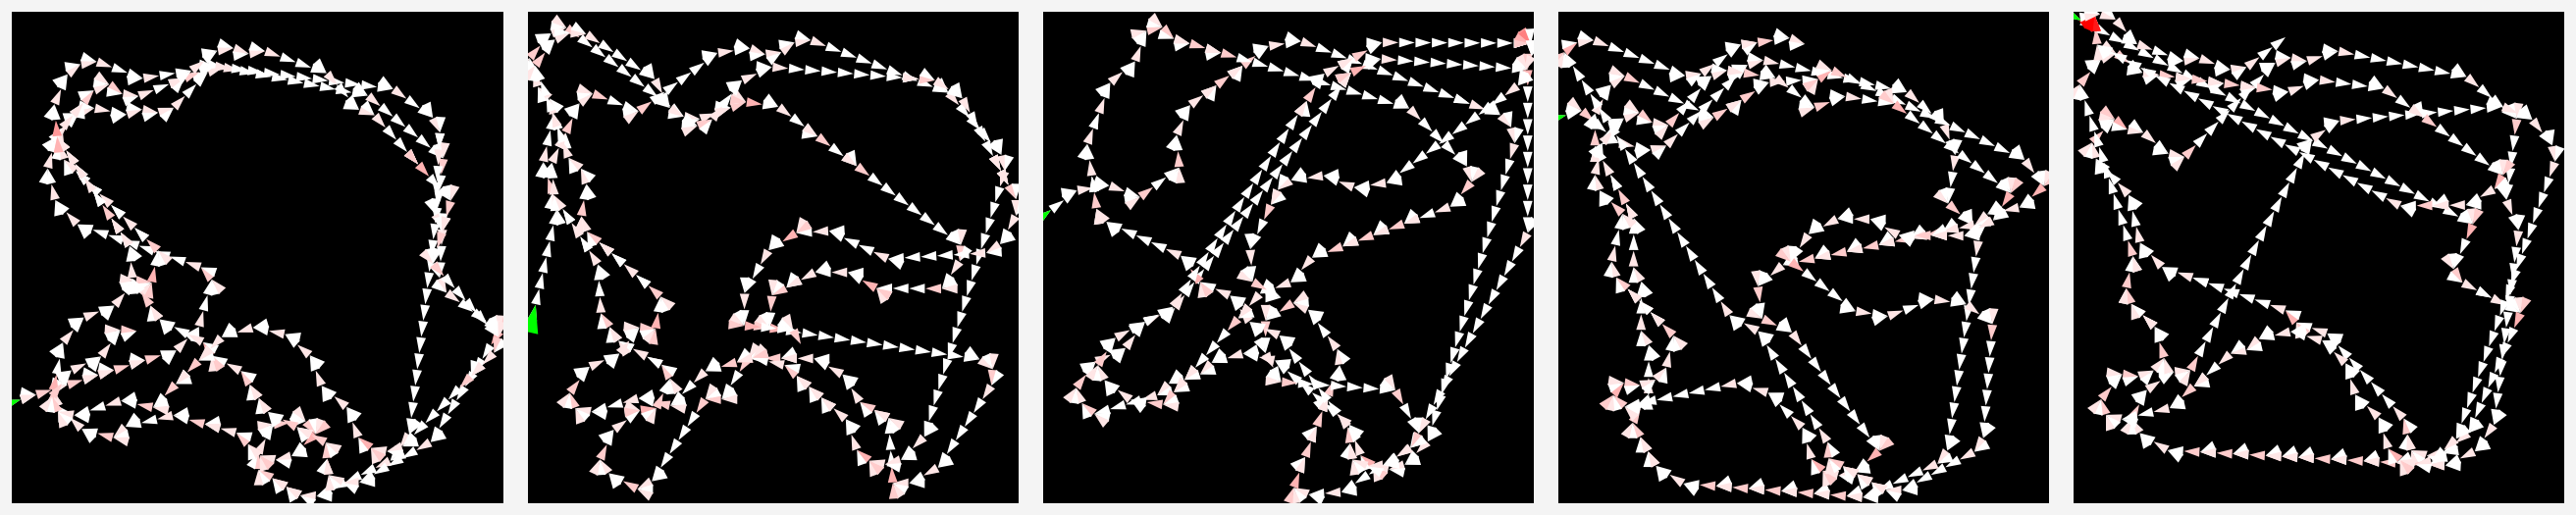

In [68]:
fig, ax = pplt.subplots(ncols=5)
for i in range(5):
    p, a = trajs[i]
    draw_trajectory(p, a, ax=ax[i])

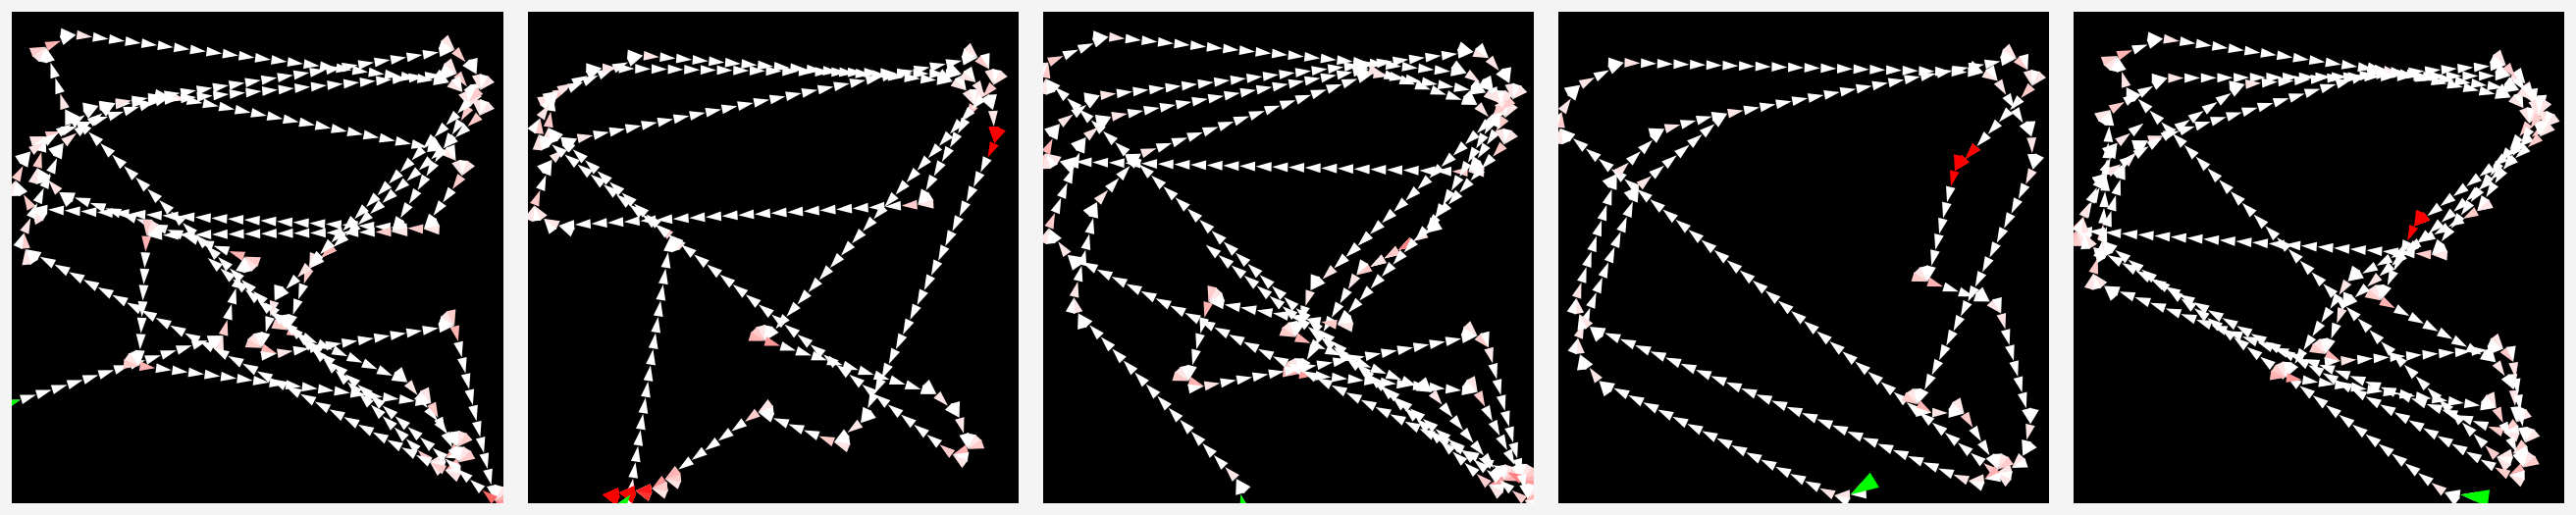

In [64]:
fig, ax = pplt.subplots(ncols=5)
for i in range(5):
    p, a = trajs[i*5]
    draw_trajectory(p, a, ax=ax[i])

In [113]:
%run representation_analysis

In [134]:
ress[0].keys()

dict_keys(['obs', 'actions', 'rewards', 'rnn_hxs', 'dones', 'masks', 'envs', 'data', 'activations', 'values', 'actor_features', 'auxiliary_preds', 'auxiliary_truths'])

In [27]:


obs_sets = [2, 3, 4, 5]
network_sizes = [64, 128, 256]

obs = 3
hidden = 64
trial = 0

exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/{save_file}')

env_kwargs = {'rew_structure': 'explorepunish1_explorebonus',
              'sub_goal_reward': 0.04, 'bonus_multiplier': 5,
              'explore_punish_arg': 5, 'obs_set': obs}

res = evaluate(model, obs_rms, env_name='ExploreNav-v0', env_kwargs=env_kwargs,
               num_episodes=10, capture_video=False, data_callback=explore_data_callback)


In [44]:


obs_sets = [2, 3, 4, 5]
network_sizes = [64, 128, 256]

obs = 3
hidden = 128
trial = 2

exp_name = f'explorenav_pos/expl_goalpos_obs3hidden{hidden}longer'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/{save_file}')

env_kwargs = {'rew_structure': 'explorepunish1_explorebonus',
              'sub_goal_reward': 0.04, 'bonus_multiplier': 5,
              'explore_punish_arg': 5, 'obs_set': obs}

res = evaluate(model, obs_rms, env_name='ExploreNav-v0', env_kwargs=env_kwargs,
               num_episodes=10, capture_video=False, data_callback=explore_data_callback)


(Figure(nrows=1, ncols=1, refwidth=2.5),
 SubplotGrid(nrows=1, ncols=1, length=1))

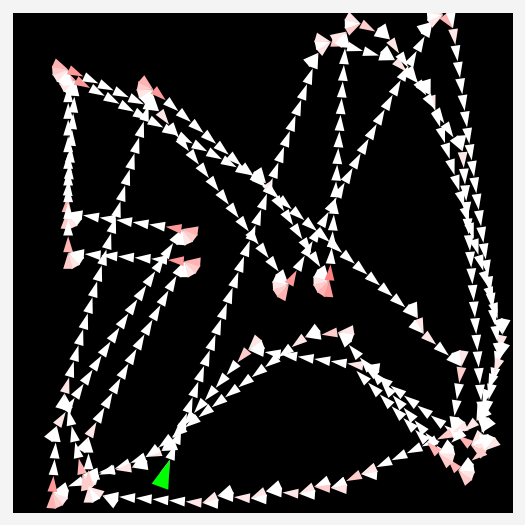

In [52]:
ep = 1
rew = res['rewards'][ep]
hanging_steps = (rew == -0.04).sum()
explore_steps = ((rew > 0.16) & (rew <= 0.2)).sum()
goal_steps = (rew > 0.2).sum()

pos = res['data']['pos'][ep]
angle = res['data']['angle'][ep]

draw_trajectory(pos, angle)

In [53]:
res['data']

0

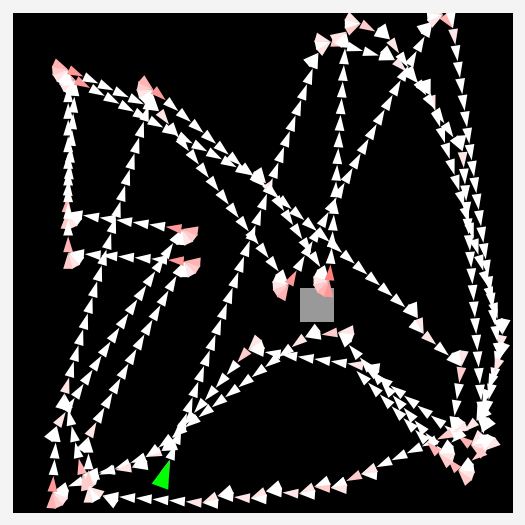

In [51]:
fig, ax = pplt.subplots()

ep = 1

draw_box(res['data']['goal'][ep][0], ax=ax)
p = res['data']['pos'][ep]
a = res['data']['angle'][ep]
draw_trajectory(p, a, ax=ax)

ax.format(xlim=[0, 300], ylim=[0, 300])

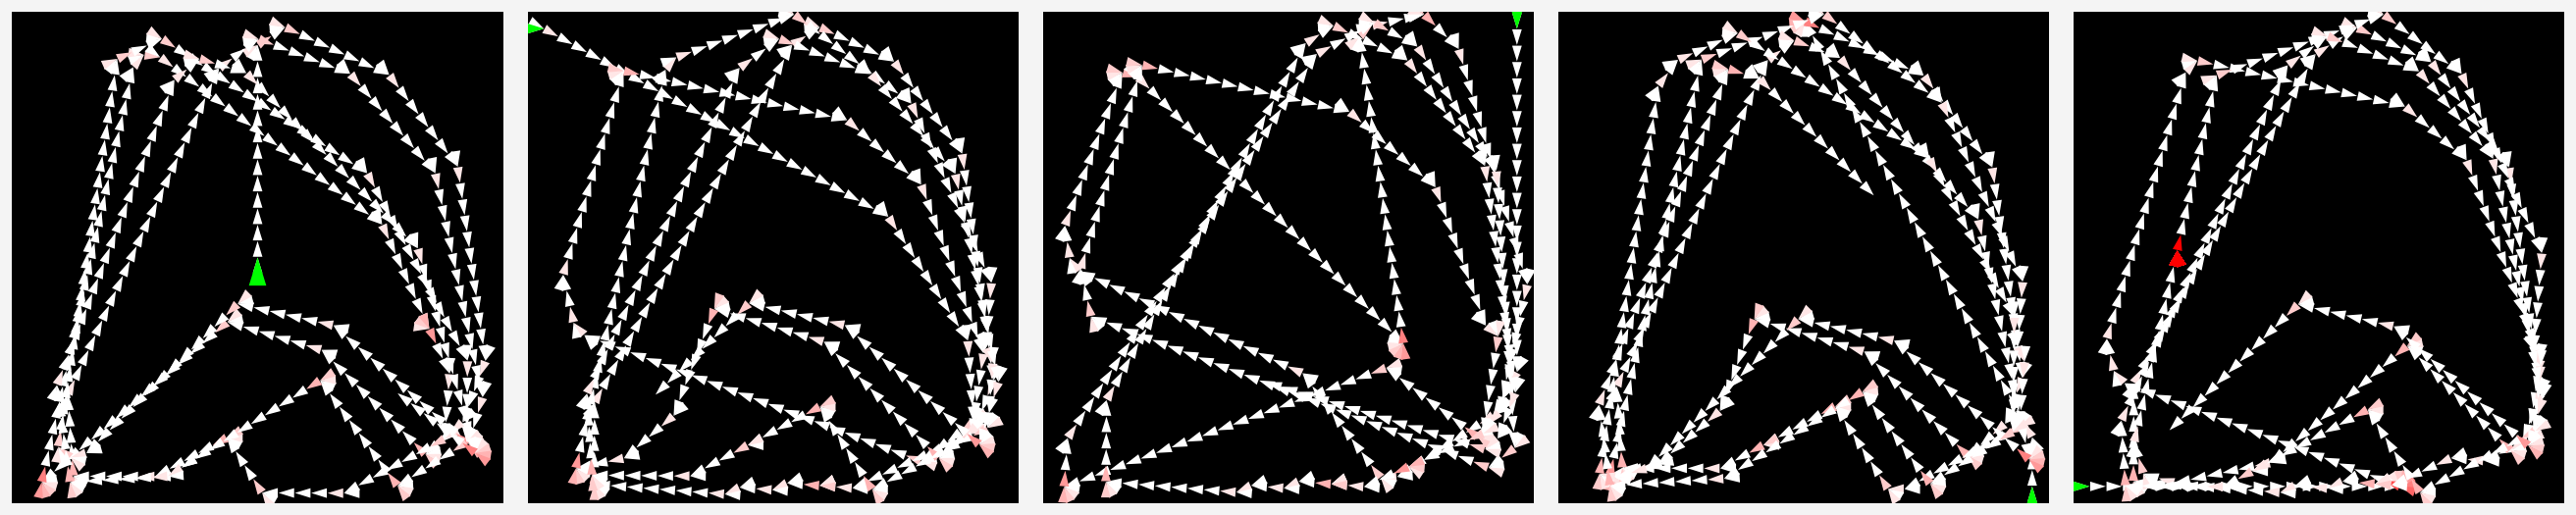

In [50]:
effs, trajs = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

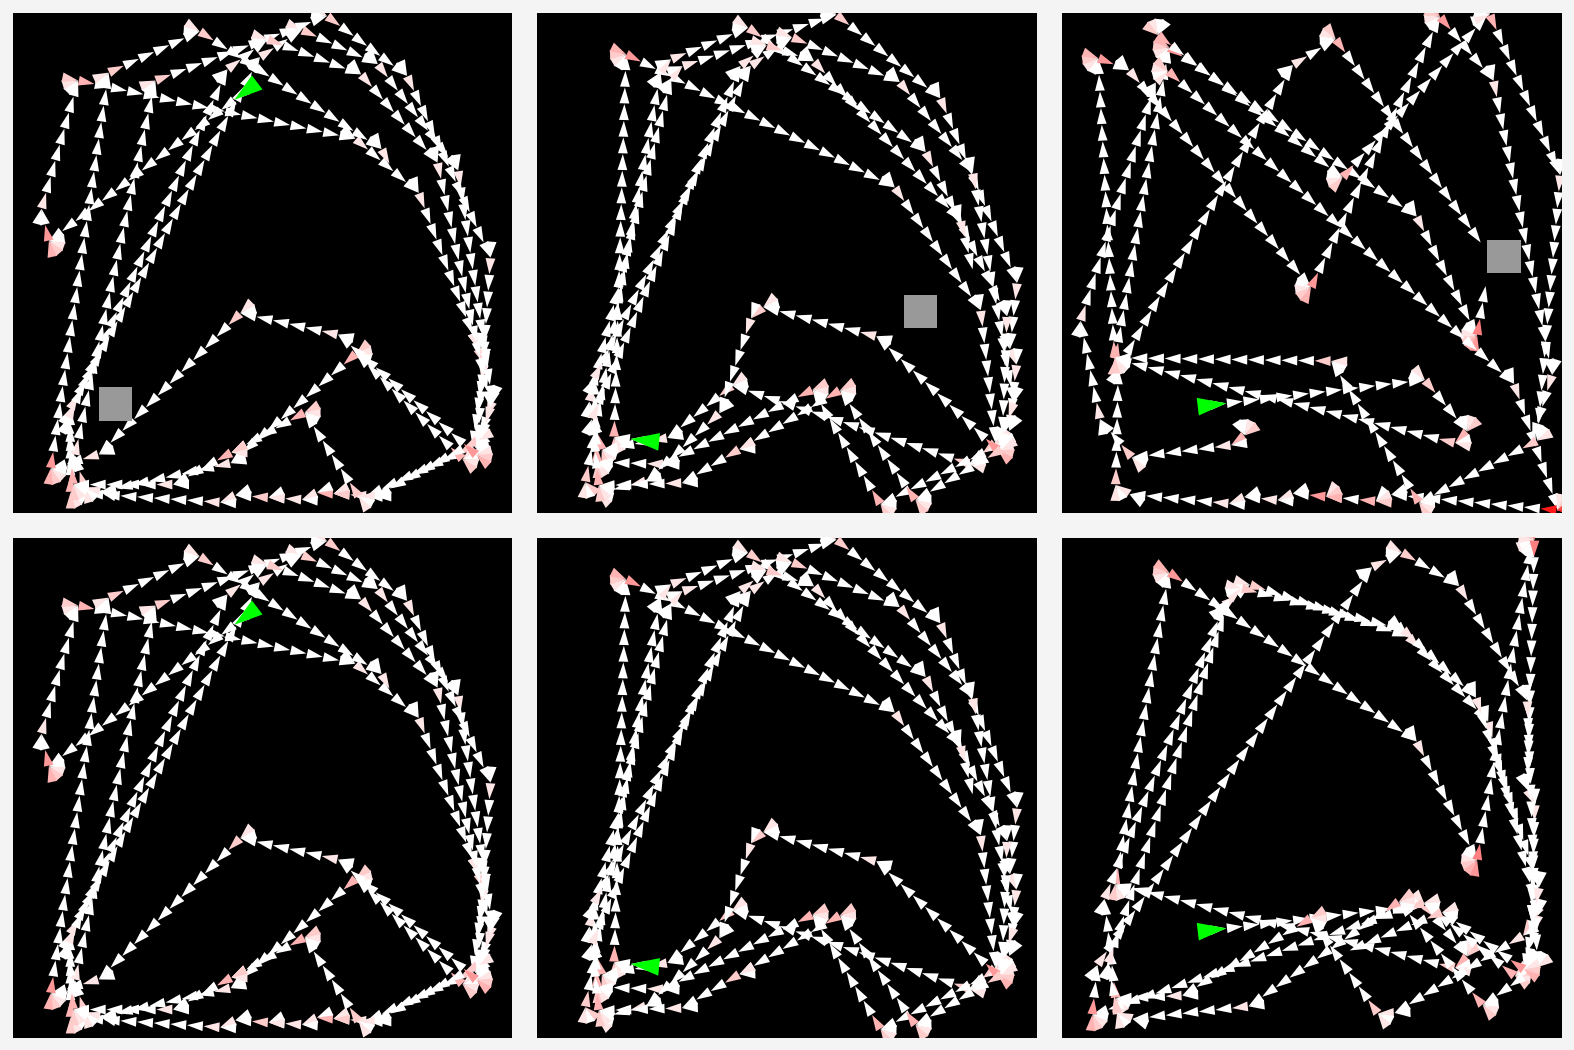

In [4]:
reset_points = []
reset_angles = []
for ep in range(3):
    p = res['data']['pos'][ep][0]
    a = res['data']['angle'][ep][0][0]
    
    reset_points.append(p)
    reset_angles.append(a)
    
    
effs, trajs, res2 = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs,
                                    manual_starts=[reset_points, reset_angles], ret_res=True)
fig, ax = pplt.subplots(ncols=3, nrows=2)

for ep in range(3):
    p = res['data']['pos'][ep]
    a = res['data']['angle'][ep]
    goal = res['data']['goal'][ep][0]
    draw_trajectory(p, a, ax=ax[0, ep])
    draw_box(goal, ax=ax[0, ep])
    draw_trajectory(trajs[ep][0], trajs[ep][1], ax=ax[1, ep])

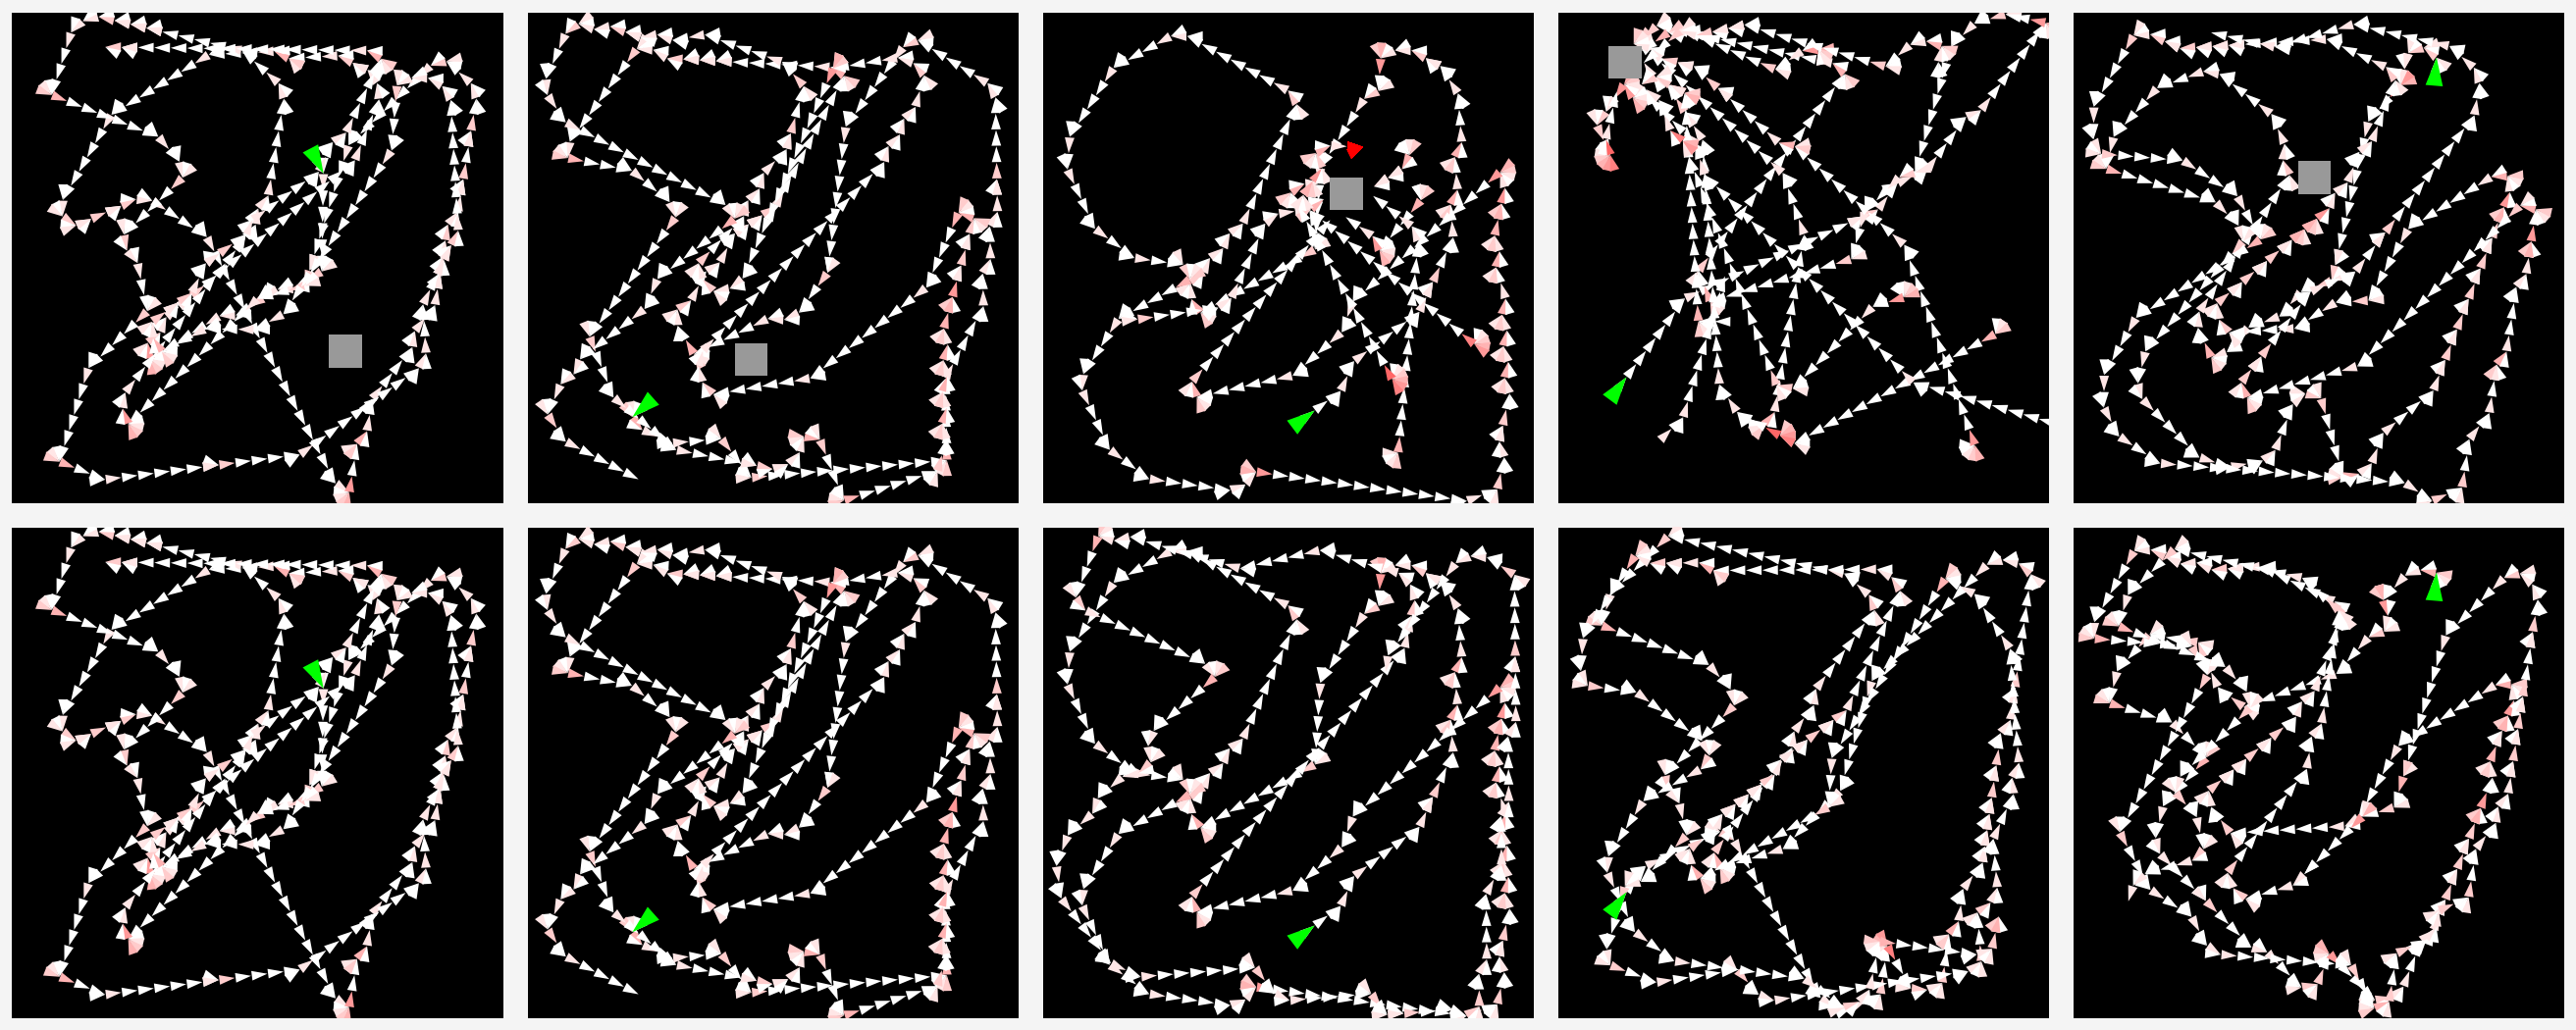

In [39]:
reset_points = []
reset_angles = []
for ep in range(5):
    p = res['data']['pos'][ep][0]
    a = res['data']['angle'][ep][0][0]
    
    reset_points.append(p)
    reset_angles.append(a)
    
    
effs, trajs, res2 = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs,
                                    manual_starts=[reset_points, reset_angles], ret_res=True)
fig, ax = pplt.subplots(ncols=5, nrows=2)

for ep in range(5):
    p = res['data']['pos'][ep]
    a = res['data']['angle'][ep]
    goal = res['data']['goal'][ep][0]
    draw_trajectory(p, a, ax=ax[0, ep])
    draw_box(goal, ax=ax[0, ep])
    draw_trajectory(trajs[ep][0], trajs[ep][1], ax=ax[1, ep])

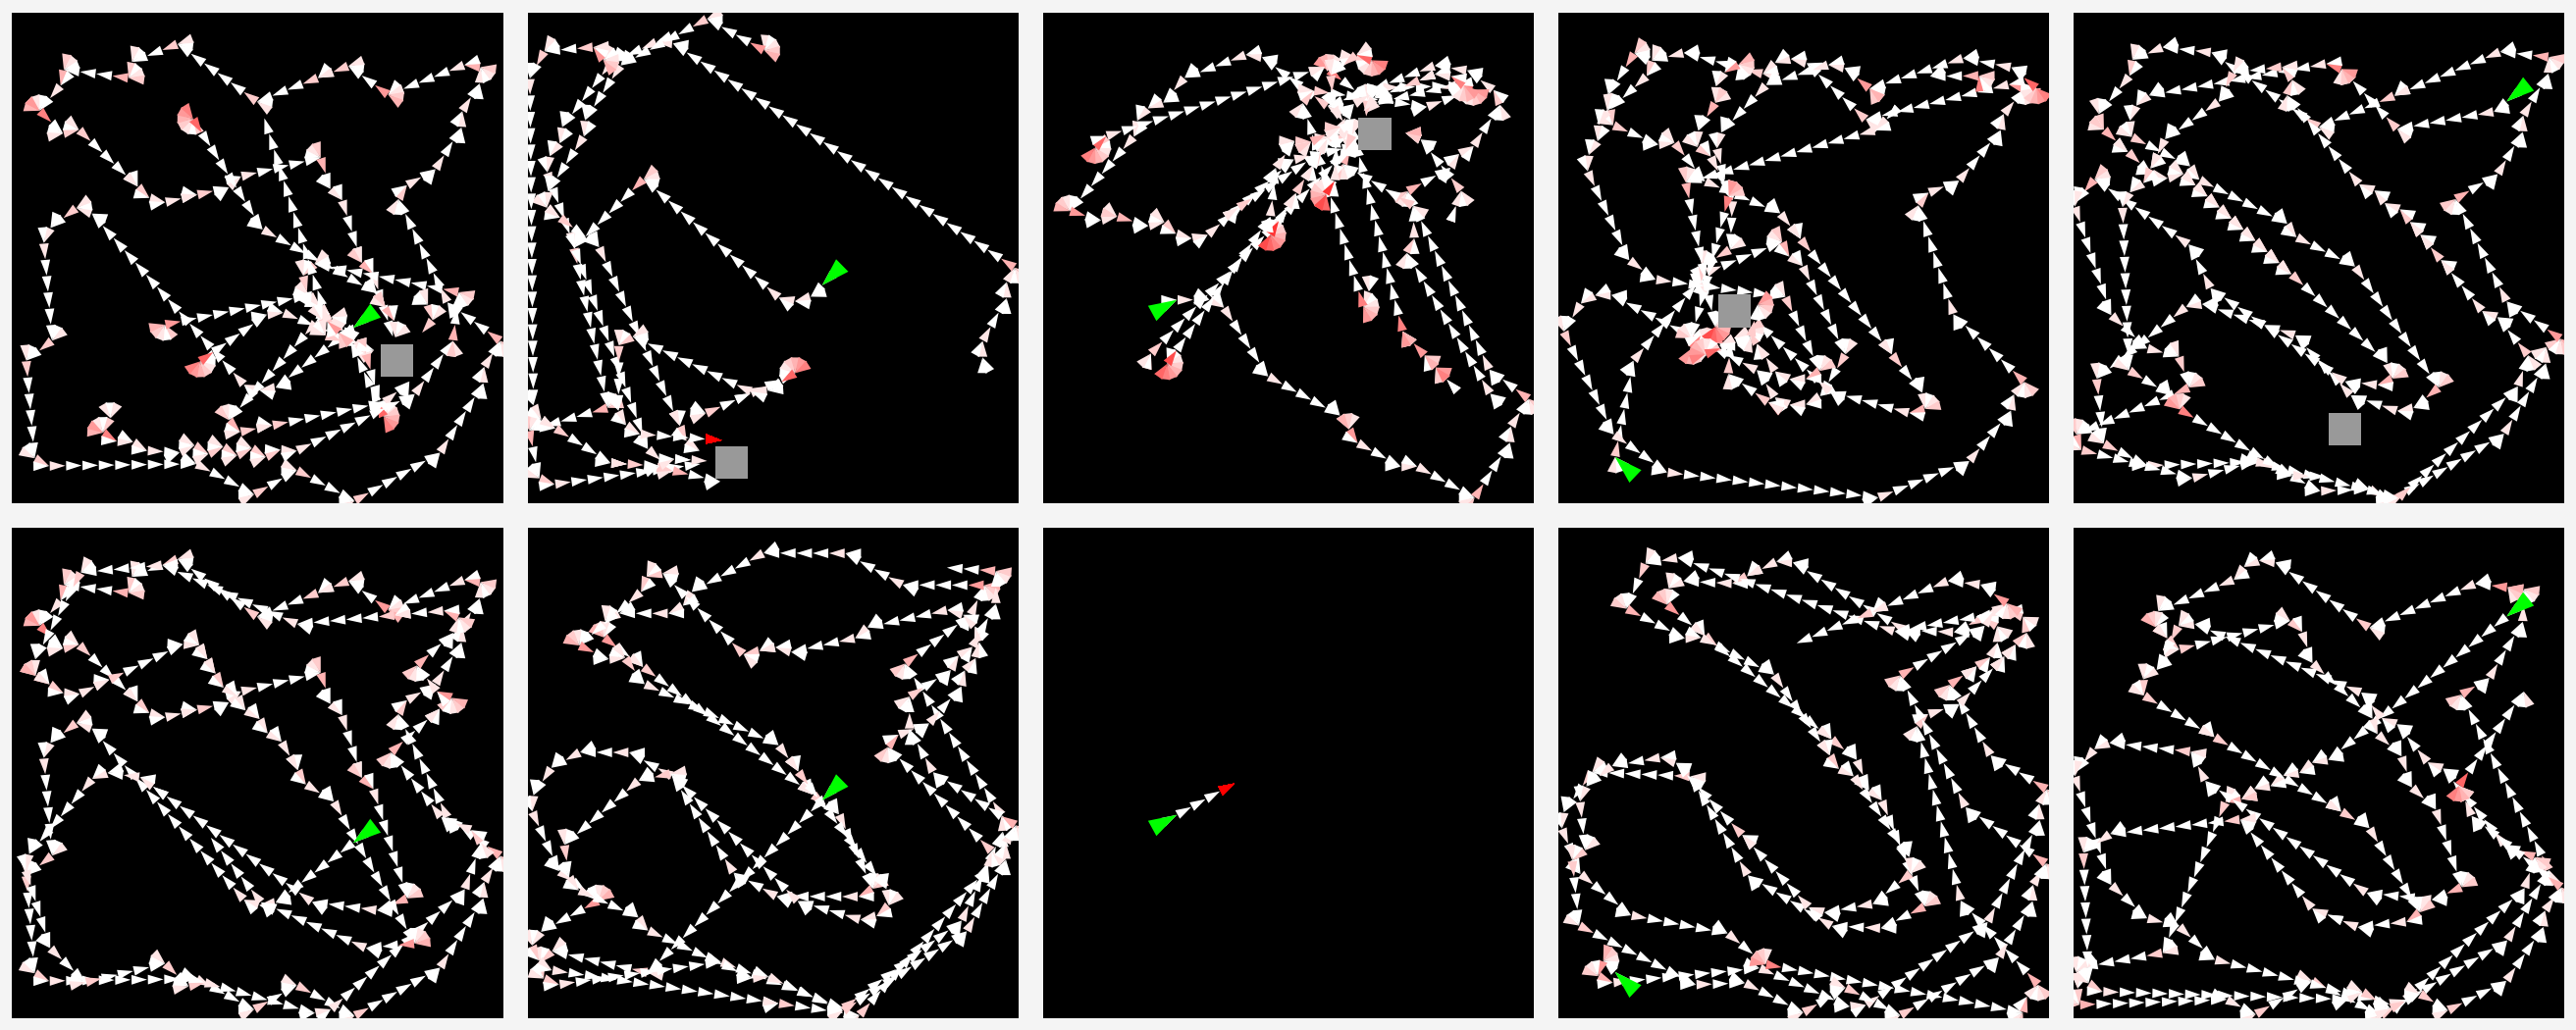

In [42]:
reset_points = []
reset_angles = []
for ep in range(5):
    p = res['data']['pos'][ep][0]
    a = res['data']['angle'][ep][0][0]
    
    reset_points.append(p)
    reset_angles.append(a)
    
    
effs, trajs, res2 = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs,
                                    manual_starts=[reset_points, reset_angles], ret_res=True)
fig, ax = pplt.subplots(ncols=5, nrows=2)

for ep in range(5):
    p = res['data']['pos'][ep]
    a = res['data']['angle'][ep]
    goal = res['data']['goal'][ep][0]
    draw_trajectory(p, a, ax=ax[0, ep])
    draw_box(goal, ax=ax[0, ep])
    draw_trajectory(trajs[ep][0], trajs[ep][1], ax=ax[1, ep])

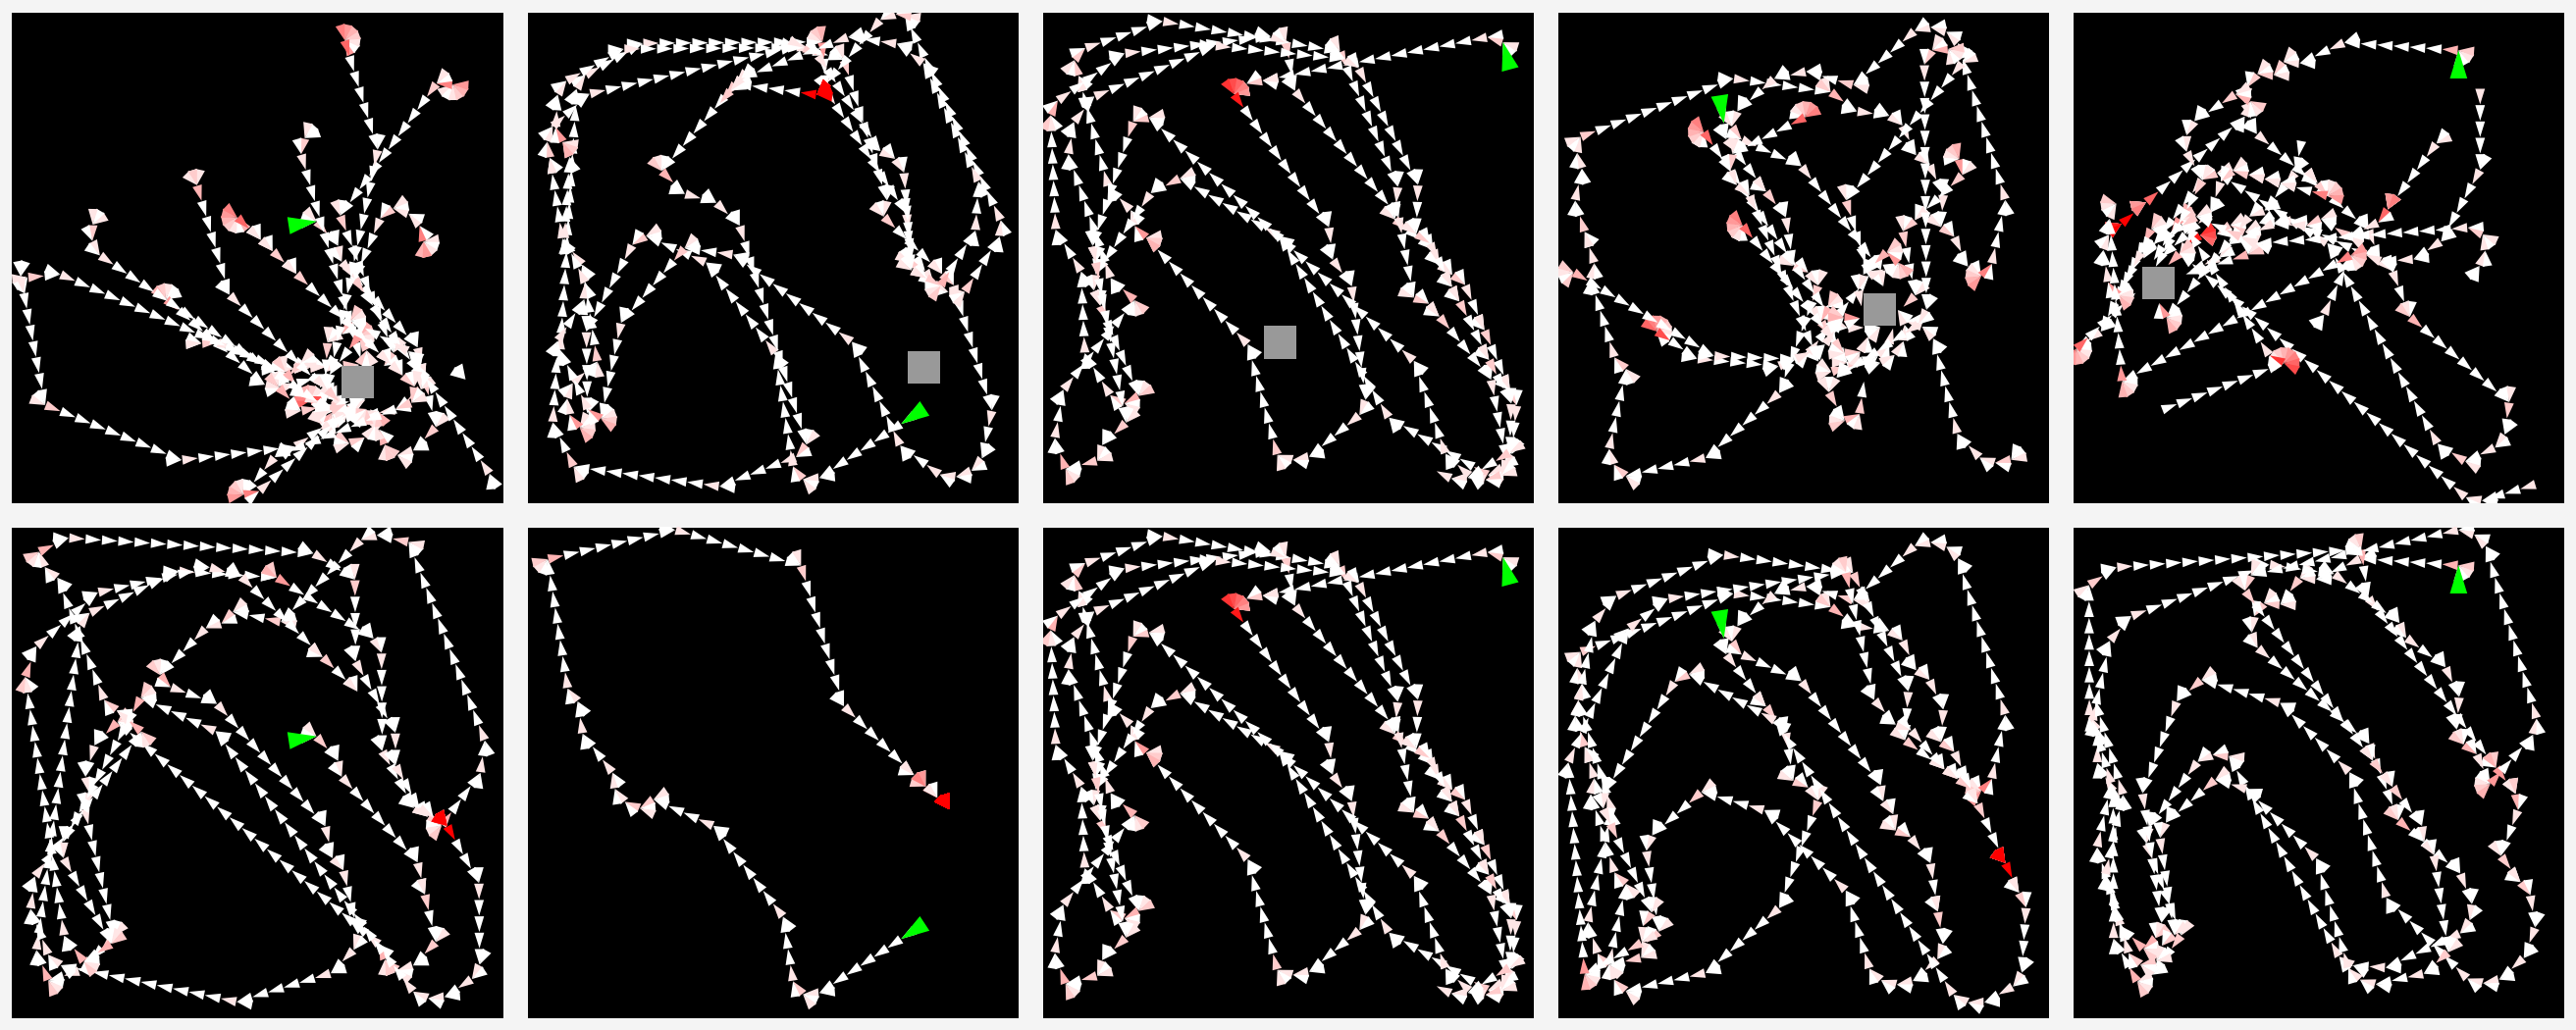

In [45]:
reset_points = []
reset_angles = []
for ep in range(5):
    p = res['data']['pos'][ep][0]
    a = res['data']['angle'][ep][0][0]
    
    reset_points.append(p)
    reset_angles.append(a)
    
    
effs, trajs, res2 = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs,
                                    manual_starts=[reset_points, reset_angles], ret_res=True)
fig, ax = pplt.subplots(ncols=5, nrows=2)

for ep in range(5):
    p = res['data']['pos'][ep]
    a = res['data']['angle'][ep]
    goal = res['data']['goal'][ep][0]
    draw_trajectory(p, a, ax=ax[0, ep])
    draw_box(goal, ax=ax[0, ep])
    draw_trajectory(trajs[ep][0], trajs[ep][1], ax=ax[1, ep])

In [20]:
cmap = pplt.Colormap('NegPos')

In [23]:
cmap(res['values'][0])

array([[[0.4663408 , 0.1879287 , 0.18788728, 1.        ]],

       [[0.4663408 , 0.1879287 , 0.18788728, 1.        ]],

       [[0.4663408 , 0.1879287 , 0.18788728, 1.        ]],

       ...,

       [[0.20546509, 0.28389228, 0.36901806, 1.        ]],

       [[0.20546509, 0.28389228, 0.36901806, 1.        ]],

       [[0.20546509, 0.28389228, 0.36901806, 1.        ]]])

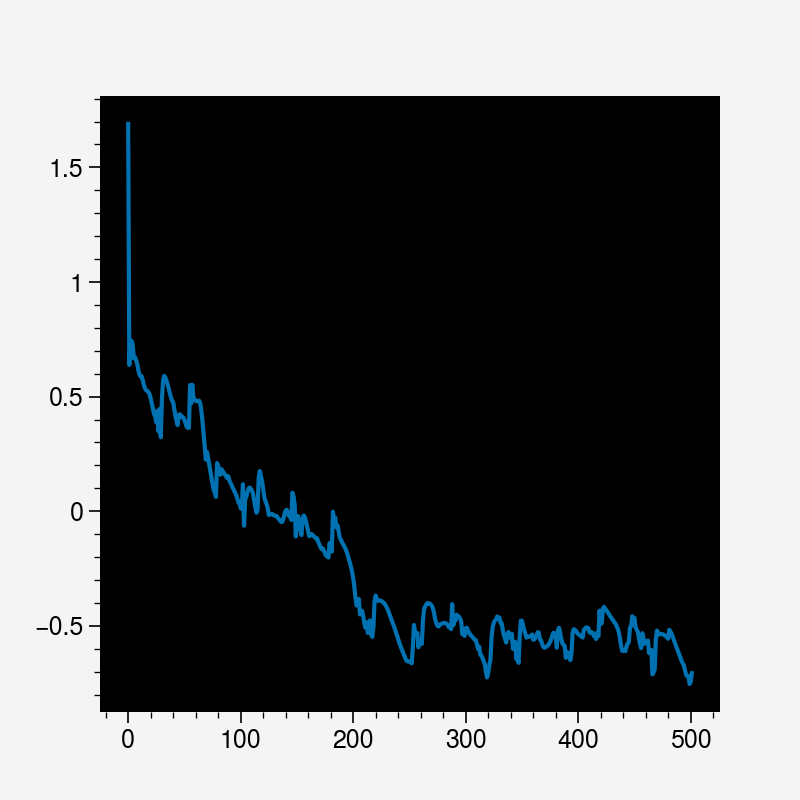

In [63]:
plt.plot(res['values'][3])

In [32]:
def get_rew_types(rew):
    hanging_steps = (rew == -0.04).sum()
    explore_steps = ((rew > 0.16) & (rew <= 0.2)).sum()
    goal_steps = (rew > 0.2).sum()
    return goal_steps, explore_steps, hanging_steps

for ep in range(10):
    goal_steps, _, _ = get_rew_types(res['rewards'][ep])
    print(f'Goals: {goal_steps}')

Goals: 0
Goals: 0
Goals: 6
Goals: 9
Goals: 0
Goals: 4
Goals: 0
Goals: 9
Goals: 0
Goals: 0


In [43]:
def get_rew_types(rew):
    hanging_steps = (rew == -0.04).sum()
    explore_steps = ((rew > 0.16) & (rew <= 0.2)).sum()
    goal_steps = (rew > 0.2).sum()
    return goal_steps, explore_steps, hanging_steps

for ep in range(10):
    goal_steps, _, _ = get_rew_types(res['rewards'][ep])
    print(f'Goals: {goal_steps}')

Goals: 6
Goals: 4
Goals: 10
Goals: 6
Goals: 0
Goals: 3
Goals: 3
Goals: 8
Goals: 3
Goals: 6


In [56]:
def get_rew_types(rew):
    hanging_steps = (rew == -0.04).sum()
    explore_steps = ((rew > 0.16) & (rew <= 0.2)).sum()
    goal_steps = (rew > 0.2).sum()
    return goal_steps, explore_steps, hanging_steps

for ep in range(10):
    goal_steps, _, _ = get_rew_types(res['rewards'][ep])
    print(f'Goals: {goal_steps}')

Goals: 16
Goals: 15
Goals: 14
Goals: 0
Goals: 0
Goals: 0
Goals: 0
Goals: 0
Goals: 11
Goals: 0


(Figure(nrows=1, ncols=1, refwidth=2.5),
 SubplotGrid(nrows=1, ncols=1, length=1))

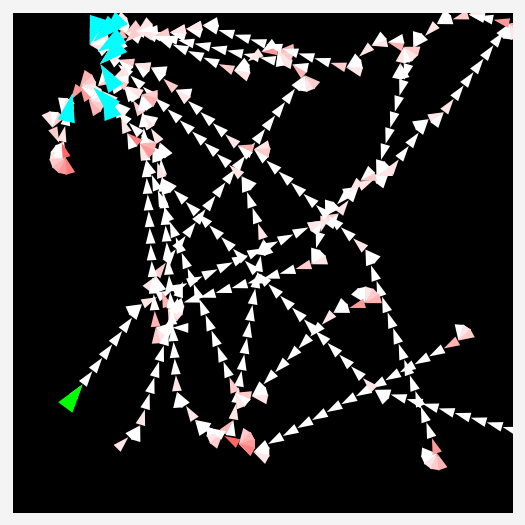

In [40]:
ep = 3
p = res['data']['pos'][ep]
a = res['data']['angle'][ep]
rew = res['rewards'][ep]

draw_trajectory(p, a, rew=rew)

(Figure(nrows=1, ncols=1, refwidth=2.5),
 SubplotGrid(nrows=1, ncols=1, length=1))

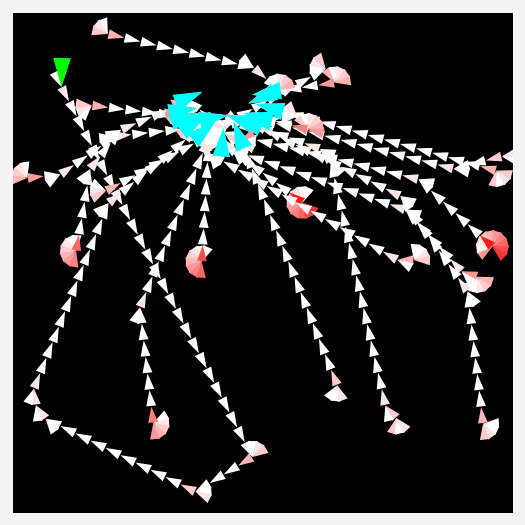

In [57]:
ep = 0
p = res['data']['pos'][ep]
a = res['data']['angle'][ep]
rew = res['rewards'][ep]

draw_trajectory(p, a, rew=rew)

In [ ]:
def draw_trajectory(pos=None, angle=None, fig=None, ax=None, rew=None,
                    cmap=None):
    '''Convert positions and angles into an image trajectory
    Adds a few extra details like where the start and goal reached locations are
    as well as adding increasing redness as the agent spends time in one spot rotating
    without forward movement
    
    rew: optionaly pass rewards for each step and use this to color
        blue steps rather than using lengh based method which we used previously
        for fixed goal task
    '''
    if fig == None and ax == None:
        fig, ax = pplt.subplots()
    stopped = 0
    last_p = np.zeros(2)
    for i, (p, a) in enumerate(zip(pos, angle)):
        redness = max(0, 1-stopped*0.1)
        color = [1, redness, redness, 1]
        draw_character(p, a[0], ax=ax, color=color)

        if (p == last_p).all():
            stopped += 1
        else:
            stopped = 0
        last_p = p

    #redraw first step
    draw_character(pos[0], angle[0][0], color=[0, 1, 0, 1], size=18, ax=ax)
    
    #draw last step assuming it is a success if number of steps is less than 202
    #  for the fixed goal task
    if rew is not None:
        rew_steps = np.where(rew == 1)[0]
        for step in rew_steps:
            draw_character(pos[step], angle[step][0], color=[0, 1, 1, 1], size=18, ax=ax)
    elif len(pos) < 202:
        draw_character(pos[-1], angle[-1][0], color=[0, 1, 1, 1], size=18, ax=ax)
    ax.format(xlim=[0, 300], ylim=[0, 300])
    
    return fig, ax

In [8]:
res['values']

[array([[ 1.1311102 ],
        [ 1.128839  ],
        [ 1.0806298 ],
        [ 1.0420511 ],
        [ 1.0108738 ],
        [ 0.98720974],
        [ 0.96872   ],
        [ 0.9531265 ],
        [ 0.93917876],
        [ 0.926242  ],
        [ 0.91344863],
        [ 0.8996837 ],
        [ 0.8861437 ],
        [ 0.8795896 ],
        [ 0.8880354 ],
        [ 0.9110055 ],
        [ 0.9341314 ],
        [ 0.95246047],
        [ 0.89129037],
        [ 0.58524746],
        [ 0.61910814],
        [ 0.7785612 ],
        [ 0.67579675],
        [ 0.6437614 ],
        [ 0.59838545],
        [ 0.55734456],
        [ 0.51321113],
        [ 0.46455163],
        [ 0.41445905],
        [ 0.3707709 ],
        [ 0.46898496],
        [ 0.5182552 ],
        [ 0.374412  ],
        [ 0.45935774],
        [ 0.455611  ],
        [ 0.36835074],
        [ 0.27773246],
        [ 0.25758877],
        [ 0.2564144 ],
        [ 0.25323668],
        [ 0.25086525],
        [ 0.25003147],
        [ 0.25036365],
        [ 0

In [60]:
env = gym.make('ExploreNav-v0', **env_kwargs)

In [61]:
env.reset()

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.5743359 , 0.55752065, 0.54533

(array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.67382663, 0.70056504, 0.7348

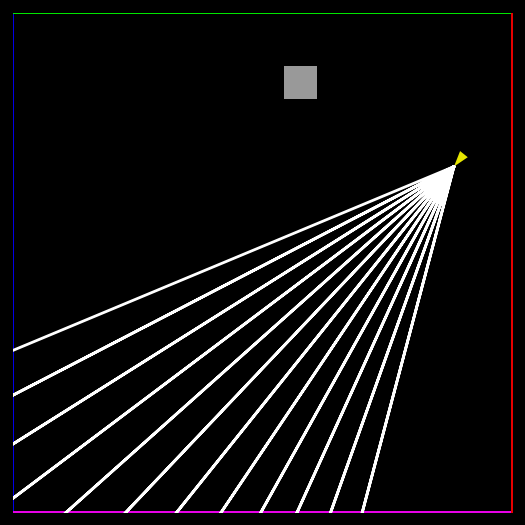

In [123]:
fig, ax = pplt.subplots()

print(env.step(1))

env.render(ax=ax)
ax.format(xlim=[0, 300], ylim=[0, 300])